# Chapter 2 - Hands-On Machine Learning

https://github.com/ageron/handson-ml

### Utilizing a fictitious dataset to learn some Machine Learning

---

## Project: California Housing Prices
(Find the data [here](https://github.com/ageron/handson-ml/tree/master/datasets/housing))

### Frame the Problem:

What is the business objective? 

    This is an important question which then helps answer the following:
        - Which algorithm(s) to use?
        - Which performance measure(s) to use?
        - How refined does the model need to be?
        
For this project, the goal is to utilize the model's prediction to aid a downstream system in its anaylsis of investment interest in a given area.
        

### What is the motivation for developing this model?

Let's assume that the current process of price prediction includes a team of experts developing a complex set of rules - this is expensive in both time and money. 

Additionally, their error rate is currently 15%

### What type of problem is this?

This is a regression problem, and supervised learning is used to train the model. We're using labeled data (supervised), and we're making predictions of values from a continuous function (regression).

It is also possible to reframe the problem into a classification task by separating the prices into categories. It could still be a supervised learning task, but, instead of outputting price predictions, the model could instead say a house is "cheap", "medium", "expensive", etc.

### How to measure the model's performance?

For regression analysis, [Root Mean Square Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is typically used. 

Alternatively, one could use the [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error).

RMSE
>a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. - Wikipedia

MAE
>a measure of difference between two continuous variables. - Wikipedia

The choice between these metrics or others depends on the end goal as well as the dataset. For instance, if the dataset has many outliers, MAE is preferred, while RMSE is preferred when the dataset is more "bell-shaped".


**The basic idea: compare how close predicted values are to expected values**

In [35]:
# A quick tip: if you are unsure about something in Python, there is a `help()` function
# help(pd.read_csv)

---

## Let's get to the programming part...

### Installation and Import

If you need to install the dependencies, run the following cell.

In [3]:
# !pip install --upgrade matplotlib numpy pandas scipy scikit-learn

In [4]:
# Checking files
import os

# Handling Data
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

In [13]:
print("hello")

hello


In [7]:
# global settings for matplotlib
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = "RdGy" # a diverging colormap

---

### Load the data
The data file is called `housing.csv`, and it can be found here: https://github.com/ageron/handson-ml/tree/master/datasets/housing.

In [14]:
FILENAME = 'housing.csv'
DATA_PATH = os.path.join('data', FILENAME)
DATA_PATH

'data\\housing.csv'

In [15]:
df = pd.read_csv(DATA_PATH)

In [22]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

---

### Clean Data

Before playing with the data and developing a model, it's important to clean the data.

In [28]:
missing_data_columns = df.columns[df.isna().any()]
missing_data_columns

Index(['total_bedrooms'], dtype='object')

In [30]:
count_missing = df['total_bedrooms'].notna().value_counts()
count_missing

True     20433
False      207
Name: total_bedrooms, dtype: int64

In [31]:
100*count_missing[False]/count_missing.sum()

1.002906976744186

With so few missing samples (~1%), it might be okay to just drop the rows. However, this is not the only way to deal with missing data.

- Imputation - using the mean, median, or some other strategy

In [36]:
df = df.dropna(axis=0)
df.head(), df.shape

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  ,
 (20433, 10))

In [43]:
missing_data_columns = df.columns[df.isna().any()]
missing_data_columns

Index([], dtype='object')

---

### Splitting the data - train and test sets

The data should be split into these sets for model evaluation purposes. After the training process, a subset of the data, the test set, helps keep the model's generalizability in check by serving as a way to test how the model performs with "unseen data". The model is updated with the training data, but it doesn't update when test data is passed to it.

It's important to split the data right away in order to avoid letting the test data influence decisions during exploration, model selection, and training.

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

test_size = 0.2 # Percent of data to keep for testing only
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size) # split - train, test

In [45]:
X_train.shape,  y_train.shape, X_test.shape, y_test.shape

((16346, 9), (16346,), (4087, 9), (4087,))

In [46]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8771     -118.34     33.80                34.0       1730.0           427.0   
14007    -117.18     32.75                52.0       1504.0           208.0   
11034    -117.82     33.78                25.0       4977.0           645.0   
10701    -117.70     33.61                16.0       2371.0           725.0   
3612     -118.42     34.24                35.0       1507.0           281.0   

       population  households  median_income ocean_proximity  \
8771       1008.0       393.0         3.9408       <1H OCEAN   
14007       518.0       196.0         8.6030      NEAR OCEAN   
11034      2061.0       646.0         6.5800       <1H OCEAN   
10701      1738.0       686.0         3.6484       <1H OCEAN   
3612       1025.0       286.0         4.5833       <1H OCEAN   

       median_house_value  
8771             327700.0  
14007            459600.0  
11034            318500.0  
10701            322600.0  
3612             177200.0

### Exploration - Let's see what the data look like.

#### Histograms are helpful

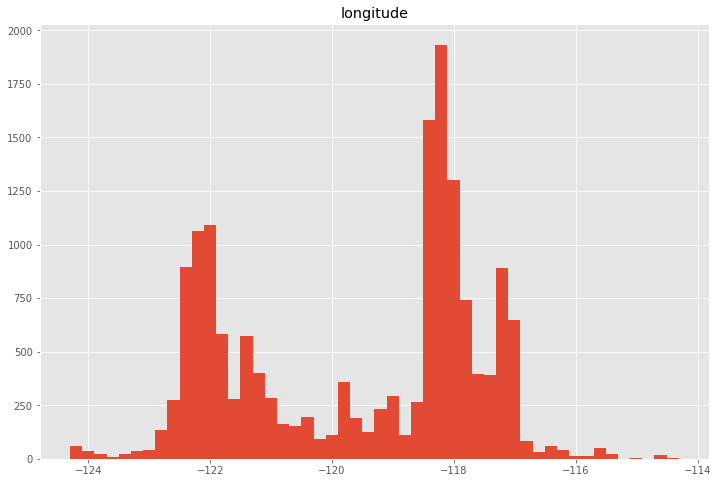

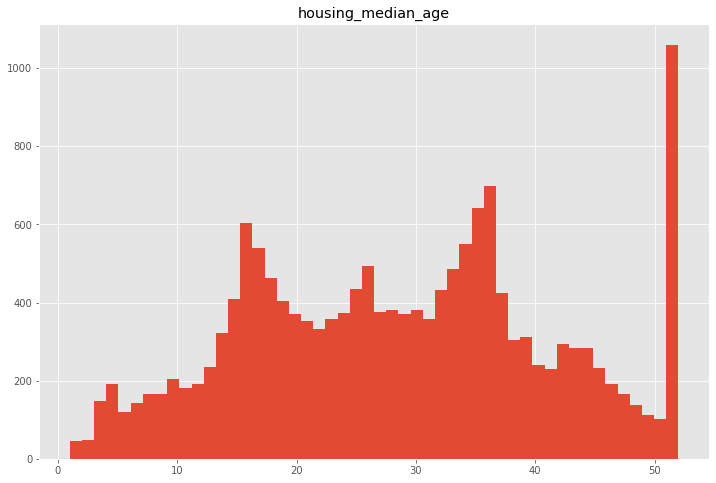

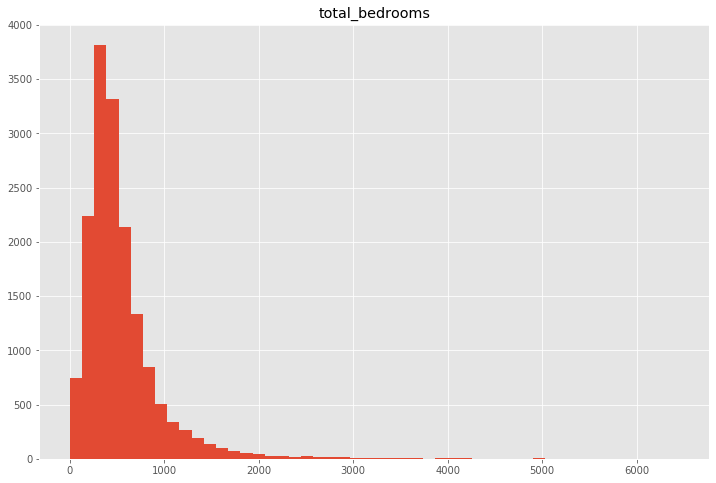

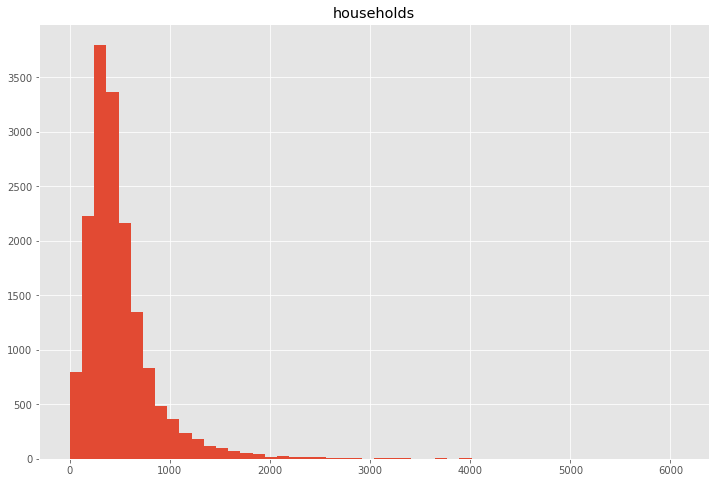

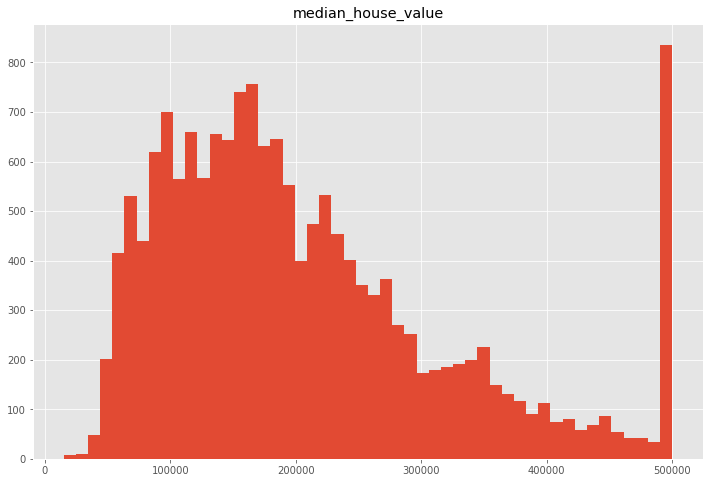

In [54]:
bins = 50
for col in df.columns:
    # ocean_proximity is a categorical variable that we'll plot separately
    if col != "ocean_proximity" and col != "label":
        plt.figure()
        plt.title(col)
        plt.hist(df[col], bins=bins)

These attributes don't look "Normal". They're skewed or they have multiple peaks. This information is helpful during the data preparation process. It can direct choices for how to transform the data prior to feeding to the model(s).

Other things to consider:

- Data Units and Scales (For example: median_income - Currency)
- Data Ranges, especially caps. In this dataset, `median_age` and `median_house_value` are both capped.

In [57]:
col = 'ocean_proximity'
plt.bar(df[col].unique(), df[col].value_counts(), label="Training")
plt.yscale('log')
None

#### Other Visualizations

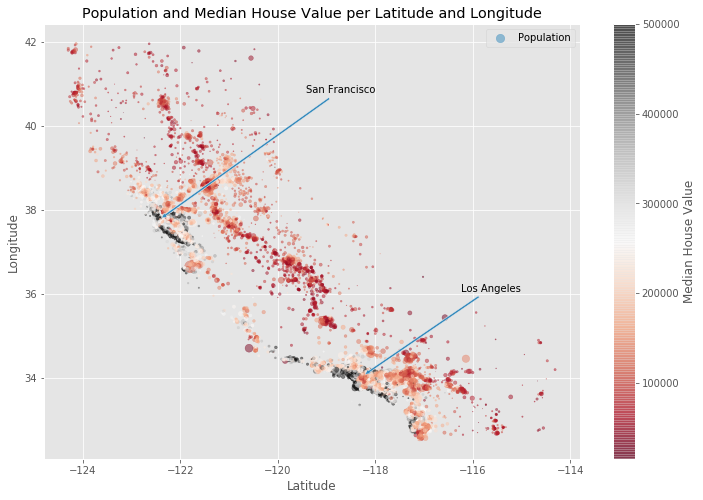

In [58]:
plt.scatter(df['longitude'], df['latitude'], 
            c=df['median_house_value'], 
            s=df['population']/200,
            label="Population",
            alpha=0.5)

plt.colorbar(label="Median House Value")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Population and Median House Value per Latitude and Longitude")


# Los Angeles
la_x, la_y = -118.2437, 34.0522

# San Francisco
sf_x, sf_y = -122.4194, 37.7749

plt.annotate("Los Angeles", 
             (la_x, la_y), 
             (la_x+2, la_y+2), 
             color="k",
             arrowprops={'arrowstyle':'simple'})

plt.annotate("San Francisco", 
             (sf_x, sf_y), 
             (sf_x+3, sf_y+3), 
             color="k",
             arrowprops={'arrowstyle':'simple'})

plt.legend()

None

<img src="images/california.jpg" width="700" align="left">

#### What about some correlations?

- Pandas: DataFrame.corr()
    - [Pearson's Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

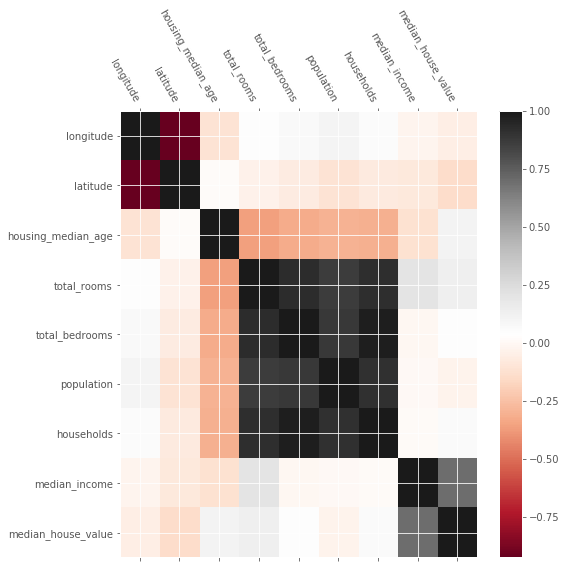

In [59]:
corr = df.drop('ocean_proximity', axis=1).corr()

plt.matshow(corr)
locs, labels = plt.xticks()
plt.xticks(locs[1:], corr.columns, rotation=-60, ha="right")
plt.yticks(locs[1:], corr.columns, ha="right")
plt.axis('tight')
plt.colorbar()
None

#### So, what does this tell us?

- The areas with towards the ends of the colorbar have strong correlations/inverse correlations.

The target variable to predict is median_house_value. We can utilize these correlations to enrichen our dataset through feature selection as well as feature engineering. 

- Select features with are strongly correlated to the target variable. 
- Modify and/or combine features which correlate strongly with the target variable.

### Feature Selection

In [60]:
features_corr = df.corr()['median_house_value'].sort_values(ascending=False)
features_corr

median_house_value    1.000000
median_income         0.691633
total_rooms           0.128253
housing_median_age    0.106495
households            0.060841
total_bedrooms        0.045347
population           -0.029383
longitude            -0.047078
latitude             -0.142313
Name: median_house_value, dtype: float64

In [62]:
features_corr = features_corr[abs(features_corr) > 0.1] # an arbitrary threshold, just for an example
features_corr

median_house_value    1.000000
median_income         0.691633
total_rooms           0.128253
housing_median_age    0.106495
latitude             -0.142313
Name: median_house_value, dtype: float64

In [63]:
from pandas.plotting import scatter_matrix

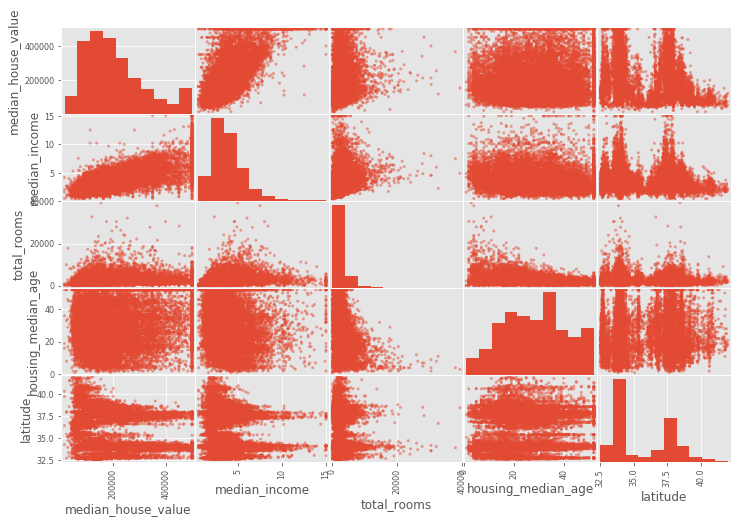

In [64]:
scatter_matrix(df[features_corr.index])
None

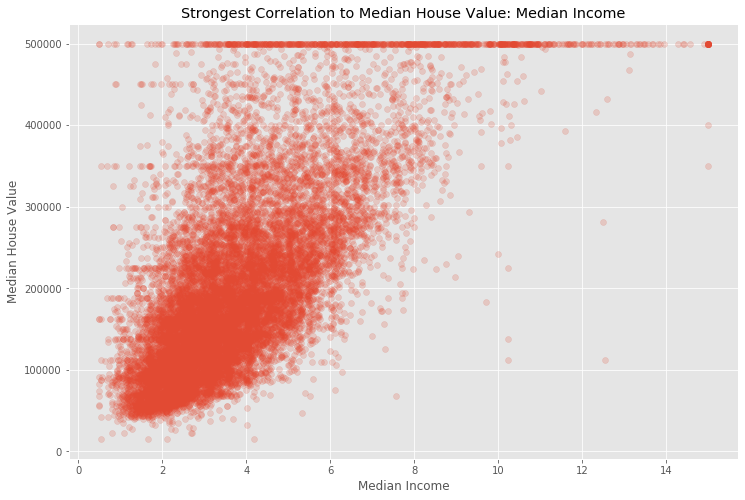

In [65]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.2)
plt.title('Strongest Correlation to Median House Value: Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
None

#### What's up with this line at the top?

- Price cap

#### Could this affect the model? How?

---

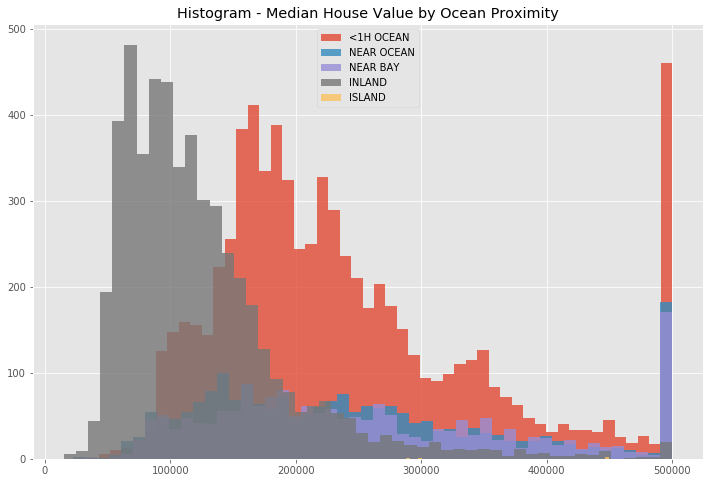

In [66]:
bins = 50
for o in df.ocean_proximity.unique():
    plt.hist(df[df.ocean_proximity == o].median_house_value, 
             label=o, 
             bins=bins, 
             alpha=0.8)
    
plt.title("Histogram - Median House Value by Ocean Proximity")
plt.legend()
None

#### Perhaps we want to use `ocean_proximity`.

Without sklearn, one option might be using a map to encode the feature

In [67]:
proximity_map = { prox: i for (i, prox) in enumerate(df.ocean_proximity.unique())}
proximity_map

{'<1H OCEAN': 0, 'NEAR OCEAN': 1, 'NEAR BAY': 2, 'INLAND': 3, 'ISLAND': 4}

### Feature Engineering
In this notebook, only a few combinations are tried out, but there are likely many more.

In [68]:
temp = df.assign(bedrooms_per_room=df['total_bedrooms']/df['total_rooms'])

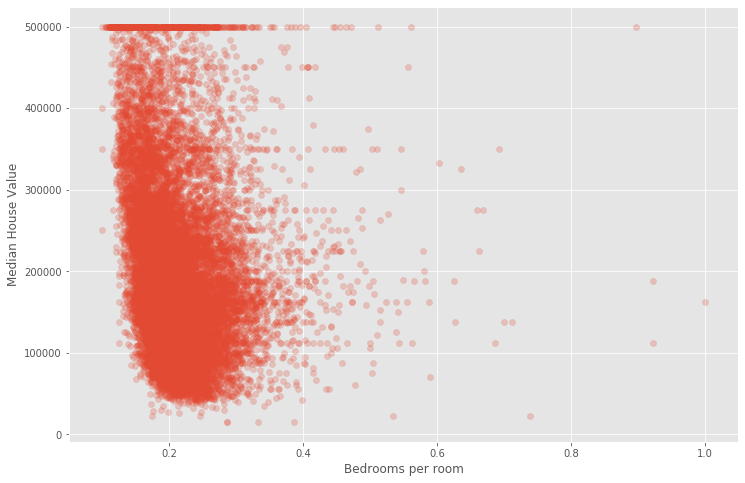

In [69]:
plt.scatter(temp['bedrooms_per_room'], temp['median_house_value'], alpha=0.25)
plt.xlabel("Bedrooms per room")
plt.ylabel("Median House Value")
None

In [70]:
temp['population_per_household'] = temp['population']/temp['households']

In [71]:
temp['population_per_household'].mean(), temp['population_per_household'].median()

(3.101843390016608, 2.817936914971134)

In [72]:
temp['population_per_household'].sort_values(ascending=False)[:10]

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
12104      63.750000
16420      51.400000
8874       41.214286
13366      33.952941
5986       21.333333
20352      19.312500
Name: population_per_household, dtype: float64

In [73]:
temp = temp[temp.population_per_household < 20]

In [74]:
plt.scatter(temp['population_per_household'], temp['median_house_value'], alpha=0.1)
plt.xlabel("Population per household")
plt.ylabel("Median House Value")
None

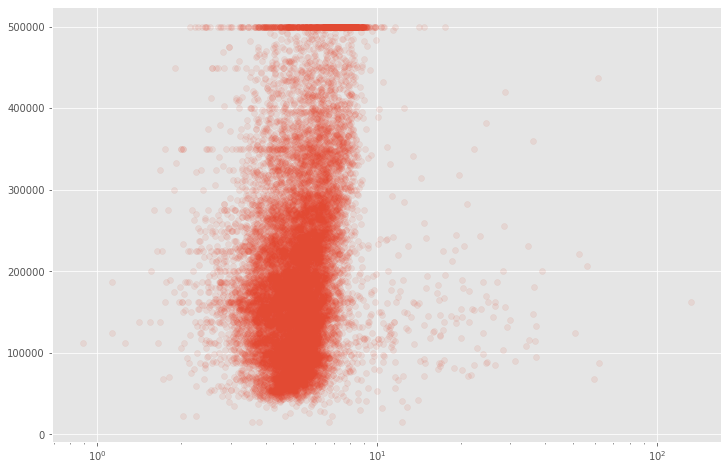

In [78]:
temp = df.assign(rooms_per_household = df['total_rooms']/df['households'])
plt.scatter(temp['rooms_per_household'], temp['median_house_value'], alpha=0.1)
plt.xscale('log')
None

In [81]:
# del temp

These new features do not show strong correlations. Instead, it might worth continuing the search for better relationships. However, it might also be worth just trying some models with the data as is.

---

In [82]:
features_corr

median_house_value    1.000000
median_income         0.691633
total_rooms           0.128253
housing_median_age    0.106495
latitude             -0.142313
Name: median_house_value, dtype: float64

## Pipeline

>A sequence of data processing components

This includes data manipulations and transforations, as well as model implementation. The different components are ideally self-contained, and they interface through access to the data store. 

The pipeline in this notebook will include data handling (cleaning, transformations, etc). Basically, anything prior to modeling.


In [88]:
def pipeline(housing_data: pd.DataFrame) -> pd.DataFrame:
    """ 
    Data handling pipeline - following process from the notebook 
    
    Args:
        
        housing_data (pd.DataFrame): data from `housing.csv`
        
    Returns:
    
        pd.DataFrame: housing data after modifications from the pipeline
    """

    global features_corr # column names for correlated features
    global proximity_map
    
    # Cleaning
    housing_data = housing_data.drop('total_bedrooms', axis=1)
    
    y = housing_data.median_house_value
    X = housing_data.drop('median_house_value', axis=1)
    
    # Feature Selection
    ocean_proximity = X.ocean_proximity
    X = X[features_corr.drop('median_house_value').index]
    X = X.assign(ocean_proximity=ocean_proximity.apply(lambda x: proximity_map[x]))
    
    return X, y
    

In [93]:
df = pd.read_csv('data/housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [95]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=test_size) # split - train, test

In [96]:
X_train, y_train = pipeline(pd.concat([X_train, y_train], axis=1))
X_test, y_test = pipeline(pd.concat([X_test, y_test], axis=1))

In [90]:
X_train.head()

median_income  total_rooms  housing_median_age  latitude  \
13369         5.9369       6135.0                 5.0     34.13   
5934          4.6937       3773.0                26.0     34.13   
5135          1.5500       1521.0                46.0     33.97   
15989         3.6346       3200.0                39.0     37.76   
3391          3.7500       1073.0                42.0     34.21   

       ocean_proximity  
13369                3  
5934                 3  
5135                 0  
15989                2  
3391                 0

In [91]:
X_test.head()

median_income  total_rooms  housing_median_age  latitude  \
17891         3.3750        148.0                34.0     37.40   
7708          6.7744       1812.0                44.0     33.95   
17219         7.7261       3725.0                32.0     34.47   
15059         1.8937       7906.0                21.0     32.80   
7382          1.7708       1026.0                36.0     33.97   

       ocean_proximity  
17891                0  
7708                 0  
17219                0  
15059                0  
7382                 0

---

### Try a couple preliminary models

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\Jeremy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [99]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
lr_preds = lr.predict(X_test)
lr_preds[:5], y_test[:5]

(array([114737.99850619, 168627.90255079, 383009.96860523,  94626.00913934,
         94025.50877155]), 1192      61300.0
 10704     74800.0
 5502     351700.0
 12439     66700.0
 1303     100000.0
 Name: median_house_value, dtype: float64)

In [107]:
pd.Series(lr_preds[:5])

0    114737.998506
1    168627.902551
2    383009.968605
3     94626.009139
4     94025.508772
dtype: float64

In [106]:
y_test[:5]

1192      61300.0
10704     74800.0
5502     351700.0
12439     66700.0
1303     100000.0
Name: median_house_value, dtype: float64

In [102]:
rf = RandomForestRegressor()

In [103]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
rf_preds = rf.predict(X_test)
rf_preds[:5], y_test[:5]

(array([ 92870.,  85330., 391810.,  90720.,  90400.]), 1192      61300.0
 10704     74800.0
 5502     351700.0
 12439     66700.0
 1303     100000.0
 Name: median_house_value, dtype: float64)

In [108]:
pd.Series(rf_preds[:5])

0     92870.0
1     85330.0
2    391810.0
3     90720.0
4     90400.0
dtype: float64

#### Scoring

`model.score` - from sklearn documentation

>Returns the coefficient of determination R^2 of the prediction.

>The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 


In [109]:
lr.score(X_test, y_test)

0.5774774606297746

In [110]:
rf.score(X_test, y_test)

0.6893523173381074

These scores are provided by methods with the model objects. Scikit learn also provides scoring functions which can be used for all kinds of tasks

`from sklearn.metrics import mean_squared_error, mean_absolute_error`

---

### This is not the end. This is not the gold standard. Go improve the pipeline and the model.

---

## Going Futher

### Scikit-Learn Tools

- Custom Transformers
- Feature Manipulation (Scaling is important)
- Pipelines
- GridSearch for Model Selection
- Cross-Validation
- Model Ensembles

... The list goes on

In [ ]:
### Example - Randomized Search
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

# from sklearn.model_selection import RandomizedSearchCV
# from time import time


# param_dist = {"max_depth": [3, None],
#               "max_features": np.random.randint(1, len(features), 10),
#               "min_samples_split": np.random.randint(2, 11, 10),
#               "bootstrap": [True, False],
#               "criterion": ["mse", "mae"]}

# # run randomized search
# n_iter_search = 20
# random_search = RandomizedSearchCV(model, param_distributions=param_dist,
#                                    n_iter=n_iter_search, cv=5, iid=False)

# start = time()
# random_search.fit(X_train[features], y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# print(random_search.cv_results_)


---